<a href="https://colab.research.google.com/github/subhash505/NLP_code/blob/main/2_CNN_manist_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
digit_mnist = keras.datasets.mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [ ]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=60,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
126/844 [===>..........................] - ETA: 25s - loss: 2.0967 - accuracy: 0.4628

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

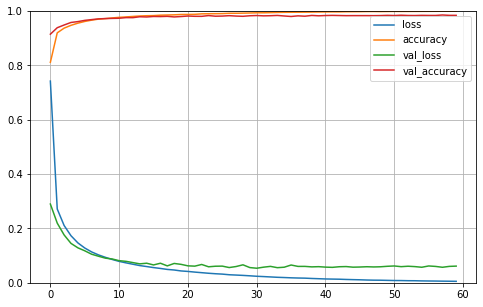

In [ ]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0574 - accuracy: 0.9836


In [ ]:
ev

[0.05736737698316574, 0.9836000204086304]

In [ ]:
keras.backend.clear_session

In [ ]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
#model_b.add(keras.layers.MaxPooling2D((2, 2)))

model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(200, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history_b = model_b.fit(X_train, y_train, epochs=3,batch_size= 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/3
844/844 [==============================] - 88s 104ms/step - loss: 0.5393 - accuracy: 0.8586 - val_loss: 0.2420 - val_accuracy: 0.9308
Epoch 2/3
844/844 [==============================] - 88s 104ms/step - loss: 0.2281 - accuracy: 0.9332 - val_loss: 0.1897 - val_accuracy: 0.9482
Epoch 3/3
844/844 [==============================] - 89s 105ms/step - loss: 0.1747 - accuracy: 0.9477 - val_loss: 0.1479 - val_accuracy: 0.9615


In [ ]:
ev_b = model_b.evaluate(X_test_n, y_test)

In [ ]:
ev_b = model_b.evaluate(X_test_n, y_test)